# Clustering Analysis using KMeans

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("user_data.csv")

In [3]:
df

,user_id,signed_on,age,cancellation_date,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost
0,39511.0,2020-09-09T00:00:00,31.0,2021-06-30,NaN,0,HOME_INSURANCE,155.0,NaN
1,54361.0,2021-06-15T00:00:00,31.0,NaN,NaN,0,HOME_INSURANCE,279.0,NaN
2,217977.0,2019-03-03T00:00:00,34.0,NaN,NaN,0,HOME_INSURANCE,228.0,NaN
3,252748.0,2019-08-04T00:00:00,36.0,2020-07-31,NaN,0,HOME_INSURANCE,239.0,NaN
4,275928.0,2020-03-19T00:00:00,34.0,NaN,Trygg-Hansa,0,HOME_INSURANCE,173.0,NaN
...,...,...,...,...,...,...,...,...,...
15995,688733894.0,2020-11-18T00:00:00,25.0,NaN,NaN,0,PHONE_INSURANCE,26.0,NaN
15996,688741553.0,2019-05-24T00:00:00,53.0,2020-07-20,Trygg-Hansa,0,HOME_INSURANCE,298.0,NaN
15997,688745399.0,2019-12-14T00:00:00,29.0,2021-01-08,Folksam,0,HOME_INSURANCE,216.0,NaN
15998,688751211.0,2021-03-04T00:00:00,42.0,NaN,NaN,0,HOME_INSURANCE,222.0,NaN


## Adding Churn as column

In [4]:
df["churn"] = df["cancellation_date"]

In [5]:
df["churn"] = df["churn"].fillna(0)

In [6]:
def f_churn(i):
    
    if i == 0:
        return "No"
    else:
        return "Yes"

In [7]:
df["churn"] = df["churn"].apply(lambda x: f_churn(x))

## Outliers

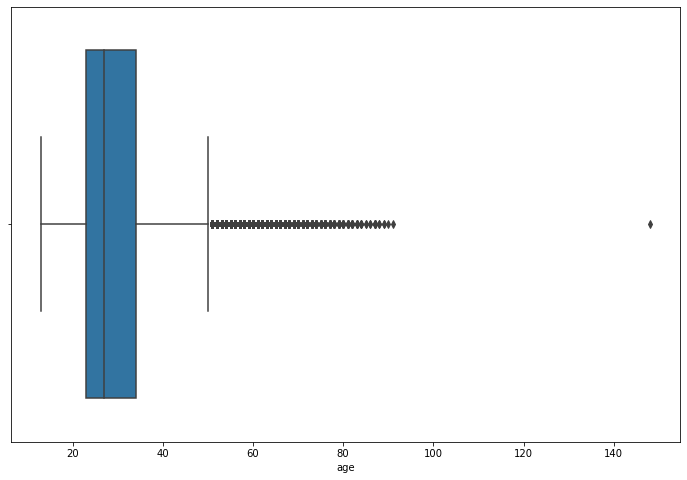

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="age")
plt.show()

In [9]:
df.loc[df.age > 100]

,user_id,signed_on,age,cancellation_date,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost,churn
8031,343750233.0,2020-05-14T00:00:00,148.0,2020-09-30,NaN,0,HOME_INSURANCE,168.0,NaN,Yes


In [10]:
df.drop(index=8031, inplace=True)

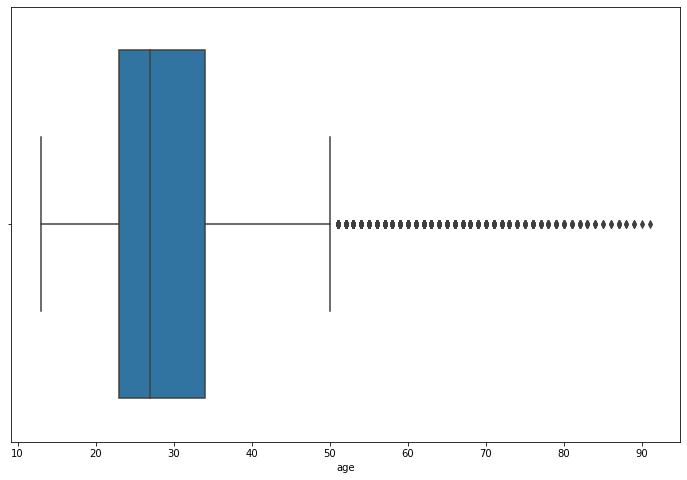

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="age")
plt.show()

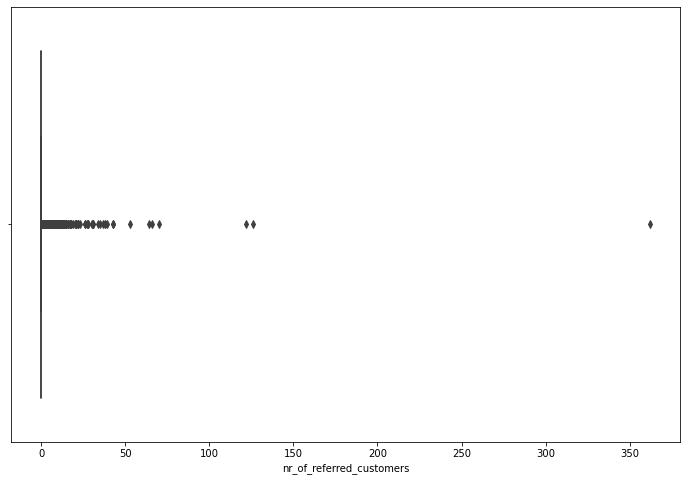

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="nr_of_referred_customers")
plt.show()

In [13]:
df.loc[df.nr_of_referred_customers > 100]

,user_id,signed_on,age,cancellation_date,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost,churn
4597,195574023.0,2020-04-10T00:00:00,27.0,NaN,NaN,122,PHONE_INSURANCE,35.0,NaN,No
7865,336555110.0,2020-12-10T00:00:00,28.0,NaN,NaN,126,HOME_INSURANCE,191.0,NaN,No
15977,688108493.0,2019-03-26T00:00:00,28.0,NaN,NaN,362,HOME_INSURANCE,124.0,NaN,No


In [14]:
df.drop(index=[4597,7865,15977], inplace=True)

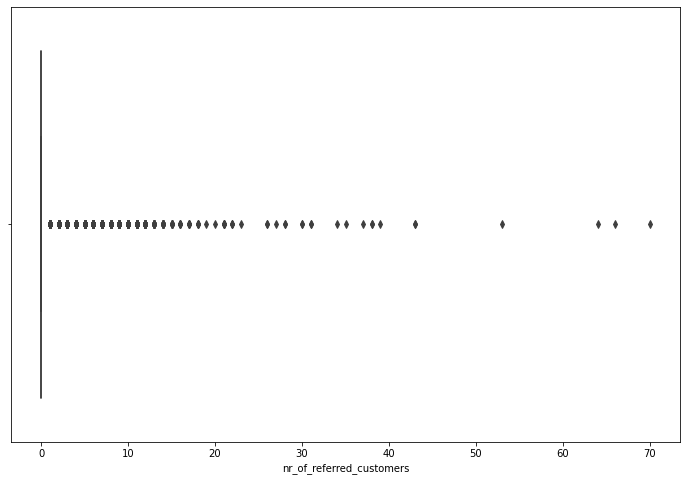

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="nr_of_referred_customers")
plt.show()

## Feature Engineering

In [16]:
df

,user_id,signed_on,age,cancellation_date,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost,churn
0,39511.0,2020-09-09T00:00:00,31.0,2021-06-30,NaN,0,HOME_INSURANCE,155.0,NaN,Yes
1,54361.0,2021-06-15T00:00:00,31.0,NaN,NaN,0,HOME_INSURANCE,279.0,NaN,No
2,217977.0,2019-03-03T00:00:00,34.0,NaN,NaN,0,HOME_INSURANCE,228.0,NaN,No
3,252748.0,2019-08-04T00:00:00,36.0,2020-07-31,NaN,0,HOME_INSURANCE,239.0,NaN,Yes
4,275928.0,2020-03-19T00:00:00,34.0,NaN,Trygg-Hansa,0,HOME_INSURANCE,173.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...
15995,688733894.0,2020-11-18T00:00:00,25.0,NaN,NaN,0,PHONE_INSURANCE,26.0,NaN,No
15996,688741553.0,2019-05-24T00:00:00,53.0,2020-07-20,Trygg-Hansa,0,HOME_INSURANCE,298.0,NaN,Yes
15997,688745399.0,2019-12-14T00:00:00,29.0,2021-01-08,Folksam,0,HOME_INSURANCE,216.0,NaN,Yes
15998,688751211.0,2021-03-04T00:00:00,42.0,NaN,NaN,0,HOME_INSURANCE,222.0,NaN,No


In [17]:
df["switched_insurance_from"] = df.switched_insurance_from.fillna("First insurance")

In [18]:
df

,user_id,signed_on,age,cancellation_date,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost,churn
0,39511.0,2020-09-09T00:00:00,31.0,2021-06-30,First insurance,0,HOME_INSURANCE,155.0,NaN,Yes
1,54361.0,2021-06-15T00:00:00,31.0,NaN,First insurance,0,HOME_INSURANCE,279.0,NaN,No
2,217977.0,2019-03-03T00:00:00,34.0,NaN,First insurance,0,HOME_INSURANCE,228.0,NaN,No
3,252748.0,2019-08-04T00:00:00,36.0,2020-07-31,First insurance,0,HOME_INSURANCE,239.0,NaN,Yes
4,275928.0,2020-03-19T00:00:00,34.0,NaN,Trygg-Hansa,0,HOME_INSURANCE,173.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...
15995,688733894.0,2020-11-18T00:00:00,25.0,NaN,First insurance,0,PHONE_INSURANCE,26.0,NaN,No
15996,688741553.0,2019-05-24T00:00:00,53.0,2020-07-20,Trygg-Hansa,0,HOME_INSURANCE,298.0,NaN,Yes
15997,688745399.0,2019-12-14T00:00:00,29.0,2021-01-08,Folksam,0,HOME_INSURANCE,216.0,NaN,Yes
15998,688751211.0,2021-03-04T00:00:00,42.0,NaN,First insurance,0,HOME_INSURANCE,222.0,NaN,No


## Null values

In [19]:
df.isna().sum()

user_id                         0
signed_on                       0
age                            10
cancellation_date           12202
switched_insurance_from         0
nr_of_referred_customers        0
policy_type                     0
monthly_premium                 0
claims_cost                 15690
churn                           0
dtype: int64

In [20]:
df.claims_cost = df.claims_cost.fillna(0)

In [21]:
df.drop(columns=["cancellation_date"],inplace=True)

In [22]:
df = df.dropna()

In [23]:
df["signed_on"] = pd.to_datetime(df.signed_on)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15986 entries, 0 to 15999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_id                   15986 non-null  float64       
 1   signed_on                 15986 non-null  datetime64[ns]
 2   age                       15986 non-null  float64       
 3   switched_insurance_from   15986 non-null  object        
 4   nr_of_referred_customers  15986 non-null  int64         
 5   policy_type               15986 non-null  object        
 6   monthly_premium           15986 non-null  float64       
 7   claims_cost               15986 non-null  float64       
 8   churn                     15986 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [25]:
df.signed_on

0       2020-09-09
1       2021-06-15
2       2019-03-03
3       2019-08-04
4       2020-03-19
           ...    
15995   2020-11-18
15996   2019-05-24
15997   2019-12-14
15998   2021-03-04
15999   2020-09-15
Name: signed_on, Length: 15986, dtype: datetime64[ns]

In [26]:
today = pd.to_datetime("2021-09-21")

In [27]:
df["time as cust"] = today - df.signed_on

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df

,user_id,signed_on,age,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost,churn,time as cust
0,39511.0,2020-09-09,31.0,First insurance,0,HOME_INSURANCE,155.0,0.0,Yes,377 days
1,54361.0,2021-06-15,31.0,First insurance,0,HOME_INSURANCE,279.0,0.0,No,98 days
2,217977.0,2019-03-03,34.0,First insurance,0,HOME_INSURANCE,228.0,0.0,No,933 days
3,252748.0,2019-08-04,36.0,First insurance,0,HOME_INSURANCE,239.0,0.0,Yes,779 days
4,275928.0,2020-03-19,34.0,Trygg-Hansa,0,HOME_INSURANCE,173.0,0.0,No,551 days
...,...,...,...,...,...,...,...,...,...,...
15995,688733894.0,2020-11-18,25.0,First insurance,0,PHONE_INSURANCE,26.0,0.0,No,307 days
15996,688741553.0,2019-05-24,53.0,Trygg-Hansa,0,HOME_INSURANCE,298.0,0.0,Yes,851 days
15997,688745399.0,2019-12-14,29.0,Folksam,0,HOME_INSURANCE,216.0,0.0,Yes,647 days
15998,688751211.0,2021-03-04,42.0,First insurance,0,HOME_INSURANCE,222.0,0.0,No,201 days


In [29]:
df["time as cust"] = df["time as cust"].astype("string")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df["time as cust"] = df["time as cust"].str.replace("days","")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df["time as cust"] = df["time as cust"].astype("int")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df.drop(columns=["user_id"],inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Scaling the data

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15986 entries, 0 to 15999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   signed_on                 15986 non-null  datetime64[ns]
 1   age                       15986 non-null  float64       
 2   switched_insurance_from   15986 non-null  object        
 3   nr_of_referred_customers  15986 non-null  int64         
 4   policy_type               15986 non-null  object        
 5   monthly_premium           15986 non-null  float64       
 6   claims_cost               15986 non-null  float64       
 7   churn                     15986 non-null  object        
 8   time as cust              15986 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.2+ MB


In [35]:
df_nums = df[["age","nr_of_referred_customers","monthly_premium","claims_cost","time as cust"]]

In [36]:
nums_scaled = scaler.fit_transform(df_nums)

## PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA()

In [39]:
pca.fit(nums_scaled)

PCA()

In [40]:
pca.explained_variance_ratio_

array([0.65411199, 0.246553  , 0.08415982, 0.01376091, 0.00141429])

## KMeans

In [41]:
from sklearn.cluster import KMeans

In [42]:
model = KMeans()

In [43]:
from yellowbrick.cluster import KElbowVisualizer

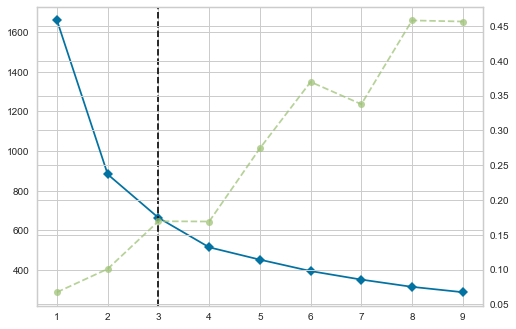

In [44]:
viz = KElbowVisualizer(KMeans(), k =range(1,10))
viz.fit(nums_scaled)
plt.show()

In [45]:
model = KMeans(3)

In [46]:
model.fit(nums_scaled)

KMeans(n_clusters=3)

In [47]:
model.labels_

array([1, 1, 0, ..., 0, 2, 1], dtype=int32)

In [48]:
df["Clusters"] = model.labels_

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Analyzing the clusters

In [49]:
df

,signed_on,age,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost,churn,time as cust,Clusters
0,2020-09-09,31.0,First insurance,0,HOME_INSURANCE,155.0,0.0,Yes,377,1
1,2021-06-15,31.0,First insurance,0,HOME_INSURANCE,279.0,0.0,No,98,1
2,2019-03-03,34.0,First insurance,0,HOME_INSURANCE,228.0,0.0,No,933,0
3,2019-08-04,36.0,First insurance,0,HOME_INSURANCE,239.0,0.0,Yes,779,0
4,2020-03-19,34.0,Trygg-Hansa,0,HOME_INSURANCE,173.0,0.0,No,551,0
...,...,...,...,...,...,...,...,...,...,...
15995,2020-11-18,25.0,First insurance,0,PHONE_INSURANCE,26.0,0.0,No,307,1
15996,2019-05-24,53.0,Trygg-Hansa,0,HOME_INSURANCE,298.0,0.0,Yes,851,0
15997,2019-12-14,29.0,Folksam,0,HOME_INSURANCE,216.0,0.0,Yes,647,0
15998,2021-03-04,42.0,First insurance,0,HOME_INSURANCE,222.0,0.0,No,201,2


In [ ]:
# Defining clusters as: high churners, students and senior

In [64]:
df.Clusters = df.Clusters.map({0:"High Churners",1:"Student",2:"Senior"})

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [50]:
df.groupby(["Clusters","churn"]).count()

signed_on   age  switched_insurance_from  \
Clusters churn                                             
0        No          3299  3299                     3299   
         Yes         1990  1990                     1990   
1        No          7150  7150                     7150   
         Yes         1216  1216                     1216   
2        No          1753  1753                     1753   
         Yes          578   578                      578   

                nr_of_referred_customers  policy_type  monthly_premium  \
Clusters churn                                                           
0        No                         3299         3299             3299   
         Yes                        1990         1990             1990   
1        No                         7150         7150             7150   
         Yes                        1216         1216             1216   
2        No                         1753         1753             1753   
         Yes                         578          578              578   

                claims_cost  time as cust  
Clusters churn                             
0        No            3299          3299  
         Yes           1990          1990  
1        No            7150          7150  
         Yes           1216          1216  
2        No            1753          1753  
         Yes            578           578

In [52]:
df.groupby(["Clusters","churn"]).age.count().unstack()

churn,No,Yes
Clusters,,
0,3299,1990
1,7150,1216
2,1753,578


In [54]:
df.groupby("Clusters").mean()

,age,nr_of_referred_customers,monthly_premium,claims_cost,time as cust
Clusters,,,,,
0,30.074305,1.032520,118.039327,151.584610,675.281339
1,25.107459,0.555821,83.625030,43.650371,213.355008
2,50.029172,0.564136,243.555556,75.106821,291.555985


In [55]:
df.groupby(["Clusters","policy_type"]).count()

signed_on   age  switched_insurance_from  \
Clusters policy_type                                                 
0        CAR_INSURANCE           17    17                       17   
         HOME_INSURANCE        3561  3561                     3561   
         PHONE_INSURANCE       1711  1711                     1711   
1        CAR_INSURANCE           31    31                       31   
         HOME_INSURANCE        3992  3992                     3992   
         PHONE_INSURANCE       4343  4343                     4343   
2        CAR_INSURANCE          650   650                      650   
         HOME_INSURANCE        1681  1681                     1681   

                          nr_of_referred_customers  monthly_premium  \
Clusters policy_type                                                  
0        CAR_INSURANCE                          17               17   
         HOME_INSURANCE                       3561             3561   
         PHONE_INSURANCE                      1711             1711   
1        CAR_INSURANCE                          31               31   
         HOME_INSURANCE                       3992             3992   
         PHONE_INSURANCE                      4343             4343   
2        CAR_INSURANCE                         650              650   
         HOME_INSURANCE                       1681             1681   

                          claims_cost  churn  time as cust  
Clusters policy_type                                        
0        CAR_INSURANCE             17     17            17  
         HOME_INSURANCE          3561   3561          3561  
         PHONE_INSURANCE         1711   1711          1711  
1        CAR_INSURANCE             31     31            31  
         HOME_INSURANCE          3992   3992          3992  
         PHONE_INSURANCE         4343   4343          4343  
2        CAR_INSURANCE            650    650           650  
         HOME_INSURANCE          1681   1681          1681

In [65]:
df.groupby(["Clusters","policy_type"]).mean().round(2)

age  nr_of_referred_customers  \
Clusters      policy_type                                        
High Churners CAR_INSURANCE    32.59                      0.88   
              HOME_INSURANCE   32.59                      1.00   
              PHONE_INSURANCE  24.82                      1.10   
Senior        CAR_INSURANCE    49.01                      0.70   
              HOME_INSURANCE   50.42                      0.51   
Student       CAR_INSURANCE    25.71                      0.42   
              HOME_INSURANCE   27.64                      0.51   
              PHONE_INSURANCE  22.78                      0.59   

                               monthly_premium  claims_cost  time as cust  
Clusters      policy_type                                                  
High Churners CAR_INSURANCE             392.41       541.24        547.35  
              HOME_INSURANCE            160.41       176.68        668.17  
              PHONE_INSURANCE            27.13        95.48        691.35  
Senior        CAR_INSURANCE             439.73        99.77        272.27  
              HOME_INSURANCE            167.70        65.57        299.01  
Student       CAR_INSURANCE             348.77        50.13        149.42  
              HOME_INSURANCE            144.03        61.87        203.40  
              PHONE_INSURANCE            26.21        26.86        222.96

In [58]:
df.groupby(["Clusters","switched_insurance_from"]).count()

signed_on   age  nr_of_referred_customers  \
Clusters switched_insurance_from                                              
0        First insurance               4250  4250                      4250   
         Folksam                        196   196                       196   
         Gjensidige                      33    33                        33   
         Hippo                           58    58                        58   
         ICA                            119   119                       119   
         Länsförsäkringar               181   181                       181   
         Moderna                         47    47                        47   
         Tre Kronor                      19    19                        19   
         Trygg-Hansa                    201   201                       201   
         if                             185   185                       185   
1        First insurance               7668  7668                      7668   
         Folksam                        156   156                       156   
         Gjensidige                       8     8                         8   
         Hippo                           60    60                        60   
         ICA                             80    80                        80   
         Länsförsäkringar                69    69                        69   
         Moderna                         33    33                        33   
         Tre Kronor                      19    19                        19   
         Trygg-Hansa                    163   163                       163   
         if                             110   110                       110   
2        First insurance               1838  1838                      1838   
         Folksam                         67    67                        67   
         Gjensidige                      31    31                        31   
         Hippo                           70    70                        70   
         ICA                             41    41                        41   
         Länsförsäkringar                55    55                        55   
         Moderna                         48    48                        48   
         Tre Kronor                      11    11                        11   
         Trygg-Hansa                     86    86                        86   
         if                              84    84                        84   

                                  policy_type  monthly_premium  claims_cost  \
Clusters switched_insurance_from                                              
0        First insurance                 4250             4250         4250   
         Folksam                          196              196          196   
         Gjensidige                        33               33           33   
         Hippo                             58               58           58   
         ICA                              119              119          119   
         Länsförsäkringar                 181              181          181   
         Moderna                           47               47           47   
         Tre Kronor                        19               19           19   
         Trygg-Hansa                      201              201          201   
         if                               185              185          185   
1        First insurance                 7668             7668         7668   
         Folksam                          156              156          156   
         Gjensidige                         8                8            8   
         Hippo                             60               60           60   
         ICA                               80               80           80   
         Länsförsäkringar                  69               69           69   
         Moderna                           33               33           33   
    

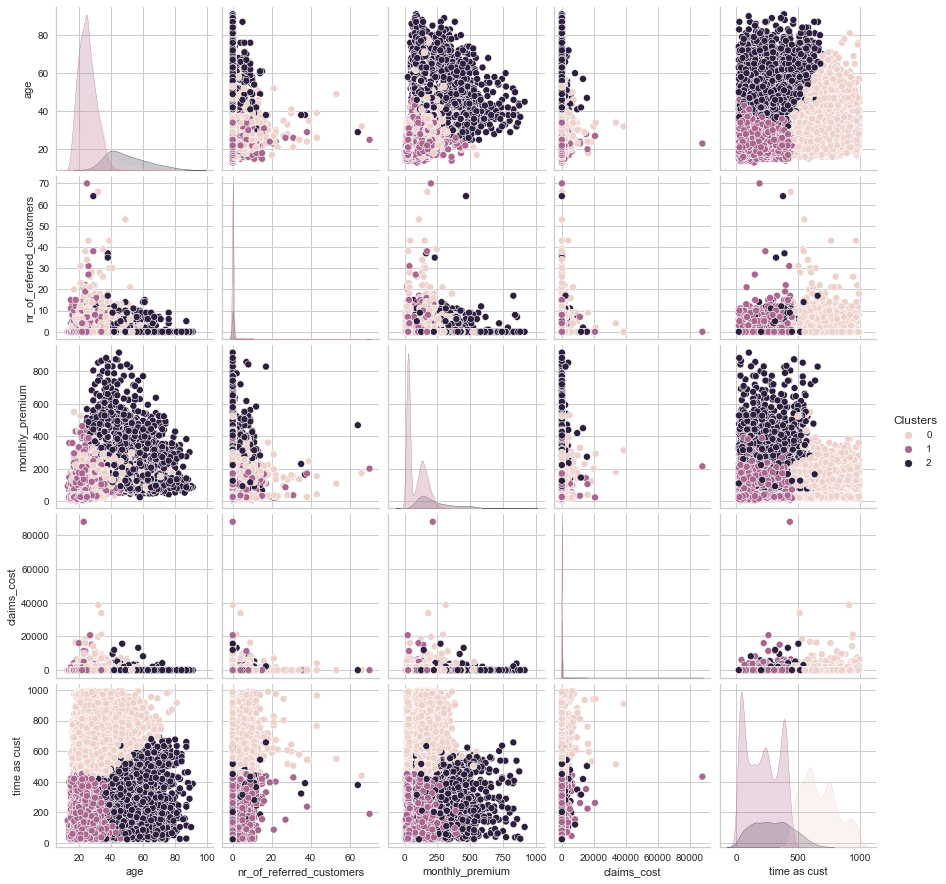

In [59]:
sns.pairplot(data=df, hue="Clusters")

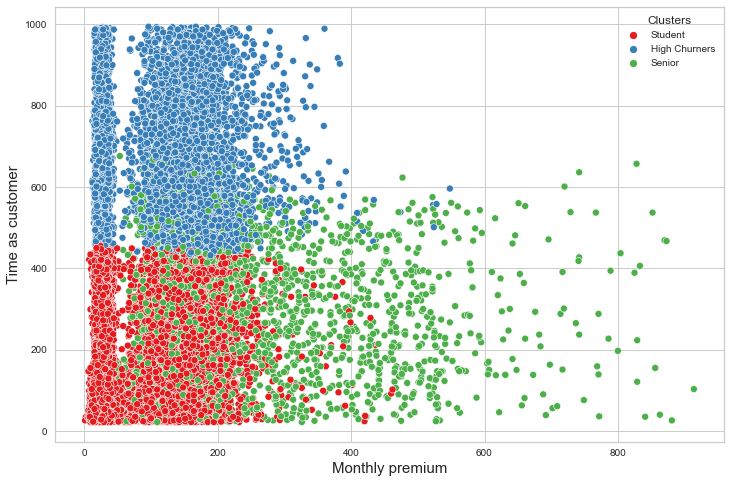

In [73]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="monthly_premium",y="time as cust", hue="Clusters")
plt.xlabel("Monthly premium", fontsize=15)
plt.ylabel("Time as customer", fontsize=15)
plt.show()

In [70]:
sns.set_palette("Set1")

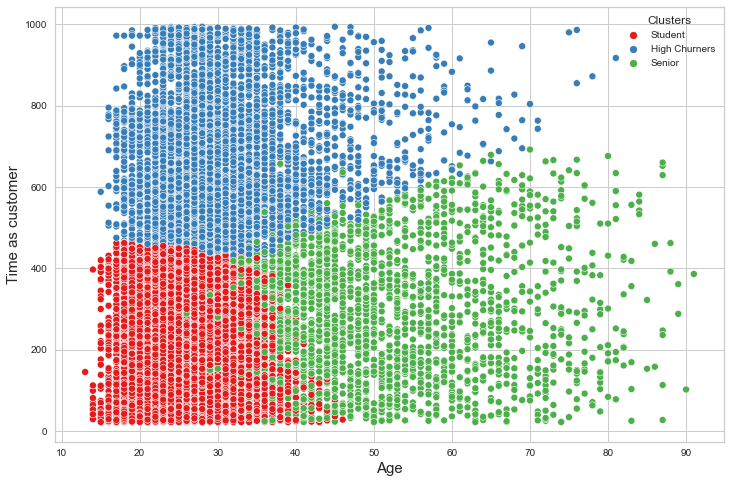

In [71]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="age",y="time as cust", hue="Clusters")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Time as customer", fontsize=15)
plt.show()

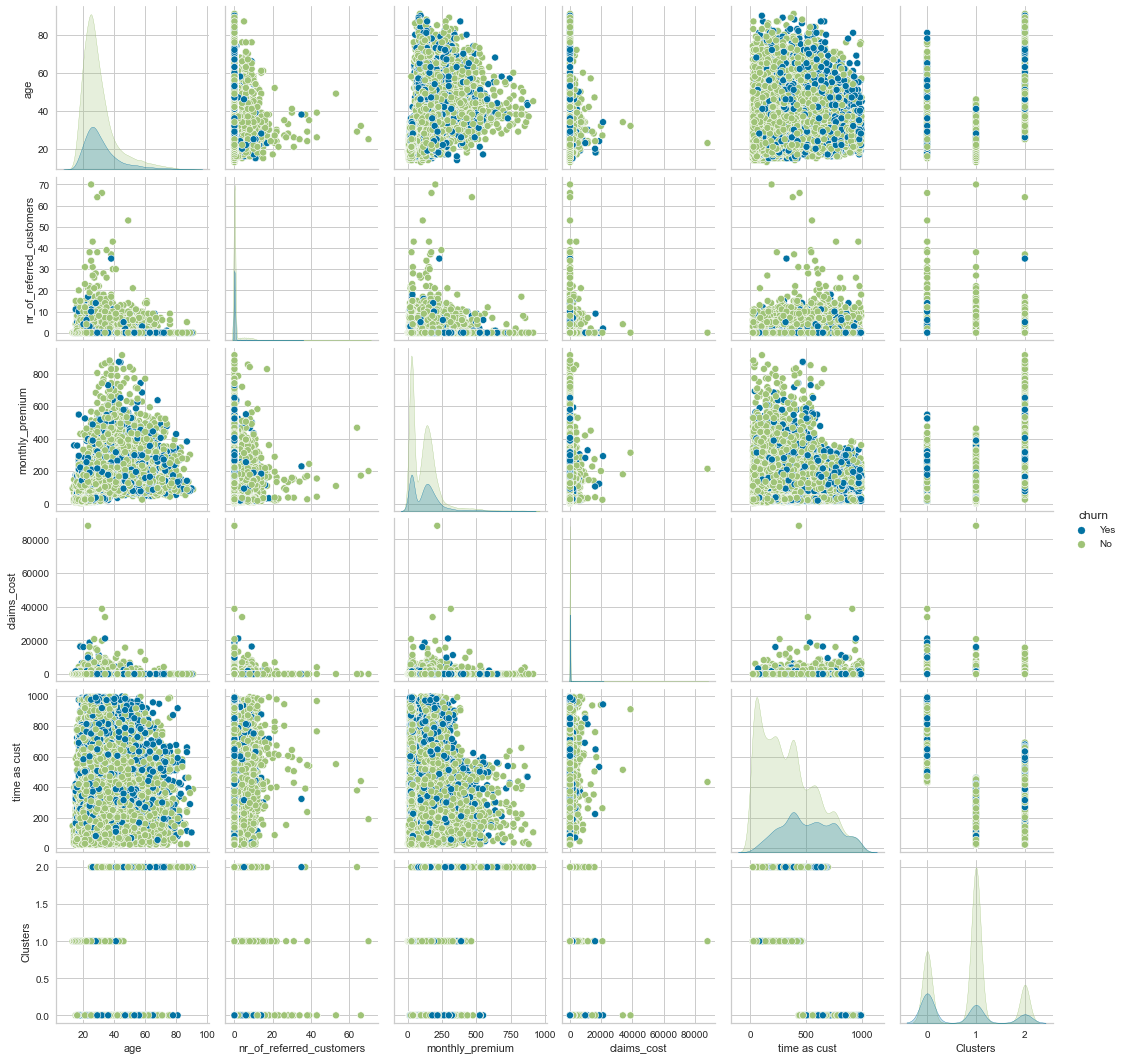

In [62]:
sns.pairplot(data=df, hue="churn")

Text(0.5, 0, 'Age')

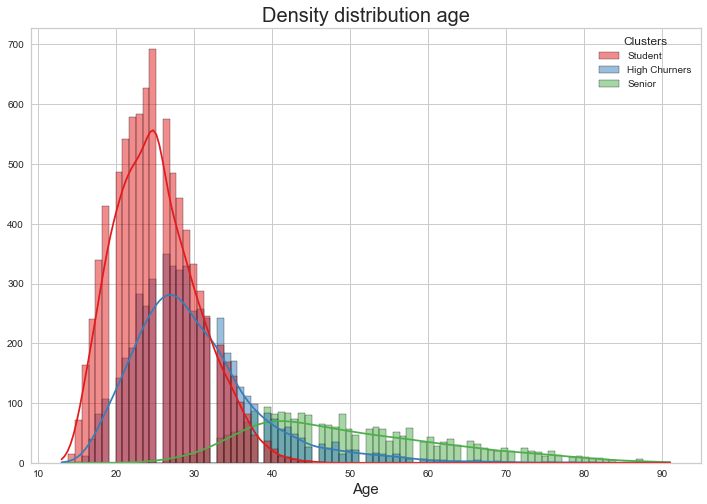

In [76]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="age", hue="Clusters", kde=True)
plt.title("Density distribution age",fontsize=20)
plt.ylabel("")
plt.xlabel("Age", fontsize=15)

Text(0.5, 0, 'Age')

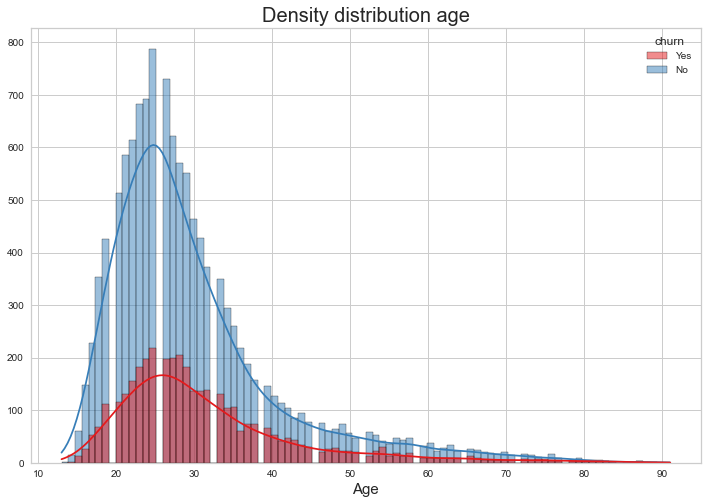

In [77]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="age", hue="churn", kde=True)
plt.title("Density distribution age",fontsize=20)
plt.ylabel("")
plt.xlabel("Age", fontsize=15)